# 네이버 기사 55개 total / word2vec embedding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
from konlpy.tag import Hannanum, Okt, Kkma
from tqdm.notebook import tqdm

In [3]:
train_data =  pd.read_csv('data/네이버 기사55.csv')
print(len(train_data)) 

53000


In [4]:
print(train_data.isnull().values.any())

True


In [5]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [6]:
print(len(train_data))

52995


In [7]:
train_data['contents'] = train_data['contents'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [8]:
train_data.head()

,Unnamed: 0,title,date,contents,company
0,0,"데코앤이, 장중 하락세, 전일대비 -14.74%... 이 시각 거래량 82만5062주",2019.11.19.,그래프 데코앤이 일봉 차트 표 거래원 상위 기준 이 시각 거래소에...,한국경제TV
1,1,"[장마감보고] 고가대비급락 종목 2위 데코앤이 섬유,의류,신발,호화품 업종내...",2019.11.19.,일 고가대비 급락종목 위 데코앤이 주가 리포트 일 시 분 기준 ...,공감신문
2,2,"데코앤이, 115원까지 올랐으나 115원 후퇴",2019.11.18.,일 데코앤이 하락종목 주가 리포트 일 시 분 현재 데코앤이 ...,내외경제tv
3,3,"[fnRASSI]장마감, 코스닥 하락 종목(데코앤이 -31.2% ↓)",2019.11.18.,일 코스닥 시장에서 하락한 종목으로 데코앤이 메지온...,파이낸셜뉴스
4,4,"데코앤이, 주가 하락 현재는 -24.64%... 이 시각 거래량 75만7821주",2019.11.18.,그래프 데코앤이 일봉 차트 표 거래원 상위 기준 이 시각 거래소에...,한국경제TV


In [64]:
stopwords = ['청주지방법원','인하다','하청','따르다','정상화','자구','못','으로부터','수표','으로서의','견디다','최종','처리','결제','불똥','밟다','공공기관','응','수사','신청서','인가','사태','관계없이','또는','수익모델','법원','절차','재산',
             '은행권','효력','지방법원','신청','의', '회계기준','개시','종결','가','난','미노','보전처분','이','말리다','에이콘','된서리','등급','탐방','회차','무','한정','화의','화의','작업','은','들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다','돼다','따르다','요건','강의','내다','설','적정','대해','전액','해소']

In [65]:
okt = Okt()
tokenized_data = []
for sentence in train_data['contents']:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    tokenized_data.append(temp_X)

기사의 최대 길이 : 56
기사의 평균 길이 : 33.16935559958487


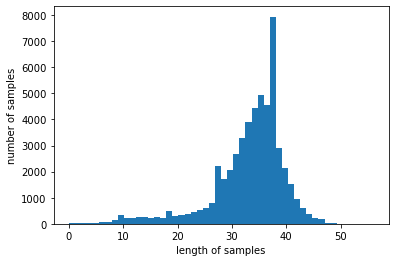

In [42]:
print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [66]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 30, window = 5, min_count = 5, workers = 4, sg = 0)

In [67]:
model.wv.vectors.shape  # 완성된 임베딩 매트릭스의 크기 확인

(12528, 30)

In [68]:
model.wv.most_similar('부도', topn=20)

[('어음', 0.6769577264785767),
 ('발생', 0.6609410047531128),
 ('당좌', 0.6584922075271606),
 ('막다', 0.6481066942214966),
 ('상장폐지', 0.6288944482803345),
 ('거래소', 0.6192703247070312),
 ('부족', 0.6020933389663696),
 ('위기', 0.6013829112052917),
 ('사취', 0.5994348526000977),
 ('연체', 0.592388391494751),
 ('특별이익', 0.5883732438087463),
 ('법정관리', 0.5818017721176147),
 ('퇴출위기', 0.581061601638794),
 ('변조', 0.5733981132507324),
 ('기도', 0.5704929232597351),
 ('일자', 0.5675440430641174),
 ('폐지', 0.5636925101280212),
 ('퇴', 0.5617879033088684),
 ('결국', 0.5604302883148193),
 ('횡령', 0.5549488067626953)]

## company 분석

In [23]:
df1 =  pd.read_csv('data/네이버 기사55.csv')
len(df1)

53000

In [24]:
print(df1.isnull().values.any())

True


In [25]:
df1 = df1.dropna(how = 'any')
print(df1.isnull().values.any())
print(len(df1))

False
52995


In [33]:
# 뉴스 업체별 기사 갯수
g_data = df1.groupby('company')['company'].count()
g_data = pd.DataFrame(g_data)
g_data = g_data.index.name = ''
g_data = g_data.columns.name = ''
g_data = g_data.sort_values(by='company', ascending=False)

,company
,
머니투데이,7551
한국경제,6086
매일경제,5573
이데일리,4936
연합뉴스,3600
...,...
라디오코리아,1
르몽드,1
마켓뉴스,1


In [146]:
v_data = df1['company'].value_counts()
v_data = pd.DataFrame(v_data)
v_data.rename(columns={'':'company','company':'count'}, inplace = True)
v_data.head()
# v_data.columns = ['company','count']
# v_data.columns.values[0] = 'company'
# v_data.sort_values(by=['company'], axis=0, ascending=False)

,count
머니투데이,7551
한국경제,6086
매일경제,5573
이데일리,4936
연합뉴스,3600
